In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from keras.datasets import reuters
from collections import Counter

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam

## loading and dividing dataset

In [0]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=10000,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [0]:
#to make sure dataset is loaded correctly
assert(len(x_train)==len(y_train))    
assert(len(x_test)==len(y_test))

## Checking Shape

In [121]:
print('Shape of the x_train: {}'. format(x_train.shape))
print('Shape of the x_test: {}'. format(x_test.shape))

print('\nNumber of Training Samples: {}'.format(len(y_train)))
print('Number of Test Samples: {}'.format(len(y_test)))
print('Number of classes: ', np.max(y_train)+1)

Shape of the x_train: (8982,)
Shape of the x_test: (2246,)

Number of Training Samples: 8982
Number of Test Samples: 2246
Number of classes:  46


## Reading a Text

In [0]:
word_index = reuters.get_word_index()
num_to_word_map = {num:word for word, num in word_index.items()}

In [123]:
decode_review = ' '.join([num_to_word_map.get(i-3,'?') for i in x_train[5]])
decode_review

"? the u s agriculture department estimated canada's 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 coarse grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3"

In [124]:
#label data
y_train[5]

4

In [125]:
#maximum number in y_train
max(y_train)

45

## Making dictionary of y_train data

In [126]:
dict(sorted(dict(Counter(y_train)).items()))

{0: 55,
 1: 432,
 2: 74,
 3: 3159,
 4: 1949,
 5: 17,
 6: 48,
 7: 16,
 8: 139,
 9: 101,
 10: 124,
 11: 390,
 12: 49,
 13: 172,
 14: 26,
 15: 20,
 16: 444,
 17: 39,
 18: 66,
 19: 549,
 20: 269,
 21: 100,
 22: 15,
 23: 41,
 24: 62,
 25: 92,
 26: 24,
 27: 15,
 28: 48,
 29: 19,
 30: 45,
 31: 39,
 32: 32,
 33: 11,
 34: 50,
 35: 10,
 36: 49,
 37: 19,
 38: 19,
 39: 24,
 40: 36,
 41: 30,
 42: 13,
 43: 21,
 44: 12,
 45: 18}

## Total number of data in graph

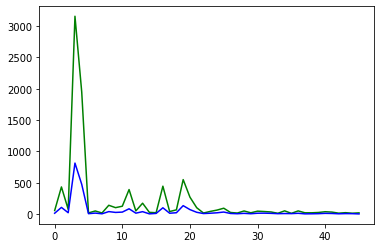

In [127]:
train_d = dict(sorted(dict(Counter(y_train)).items()))
test_d = dict(sorted(dict(Counter(y_test)).items()))

plt.plot(list(train_d.keys()),  list(train_d.values()), 'g', label='train_label')
plt.plot(list(test_d.keys()),  list(test_d.values()), 'b', label='test_label')

In [128]:
#maximum sequence 
max([max(sequence) for sequence in x_train])

9999

## Converting to Vector

In [0]:
def converting_to_vector(data, dimension=10000):
    result = np.zeros((len(data), dimension))
    for i, val in enumerate(data):
        result[i, val] = 1
        
    return result

x_train = converting_to_vector(x_train)
x_test = converting_to_vector(x_test)


## Data Standardization

In [0]:
x_train = x_train/255
#x_test = x_test/255

## Normalizing

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
x_train = scaler.fit_transform(x_train)
#x_test = scaler.fit_transform(x_test)

## One-Hot-Encoder

In [0]:
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)

## Dividing Data to Train and Valid

In [0]:
Xtrain,xvalid, Ytrain,yvalid = train_test_split(x_train,one_hot_train_labels, test_size=.2, random_state=0)

## Model

In [0]:
model = Sequential()
model.add(Dense(512, input_shape=(10000,), activation='sigmoid'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(256, input_shape=(10000,), activation='sigmoid'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(128, input_shape=(10000,), activation='sigmoid'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(64, input_shape=(10000,), activation='sigmoid'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(46))
model.add(Activation('softmax'))


In [135]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               5120512   
_________________________________________________________________
activation_21 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_22 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)              

In [0]:
# compile the model
model.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Training The Model

In [137]:
history = model.fit(Xtrain, Ytrain, epochs=4, verbose=1, validation_data=(xvalid,yvalid))

Train on 7185 samples, validate on 1797 samples
Epoch 1/4
7185/7185 [==============================] - 2s 223us/step - loss: 2.3781 - accuracy: 0.4019 - val_loss: 1.8195 - val_accuracy: 0.5459
Epoch 2/4
7185/7185 [==============================] - 1s 200us/step - loss: 1.6879 - accuracy: 0.5762 - val_loss: 1.5678 - val_accuracy: 0.6383
Epoch 3/4
7185/7185 [==============================] - 1s 197us/step - loss: 1.5088 - accuracy: 0.6291 - val_loss: 1.5033 - val_accuracy: 0.6439
Epoch 4/4
7185/7185 [==============================] - 1s 202us/step - loss: 1.3851 - accuracy: 0.6601 - val_loss: 1.4633 - val_accuracy: 0.6561


## Evaluating with test Data

In [138]:
#evaluating the test data
results = model.evaluate(x_test, one_hot_test_labels, verbose=1)
print('Test loss :',results[0])
print('Test accuracy :',results[1])

2246/2246 [==============================] - 0s 93us/step
Test loss : 1.516536662967101
Test accuracy : 0.6424754858016968


## Accuracy and Loss graph

<Figure size 432x288 with 0 Axes>

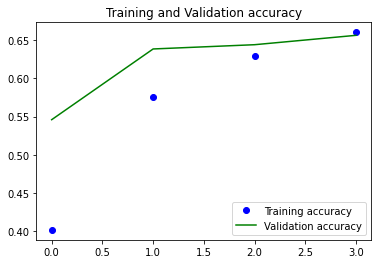

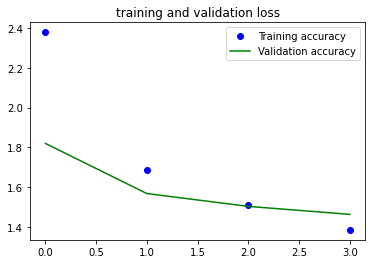

<Figure size 432x288 with 0 Axes>

In [139]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))


plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss, 'g', label='Validation accuracy')
plt.title('training and validation loss')
plt.legend()
plt.figure()

## Pedicting with test data

In [140]:
predicted_classes = model.predict(x_test)

predicted_classes = np.argmax(predicted_classes, axis=1)
print('Shape of predicted classes :', predicted_classes.shape)
print('Shape of y_test :',y_test.shape)

Shape of predicted classes : (2246,)
Shape of y_test : (2246,)


## Classification Report

In [141]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.23      0.83      0.37       105
           2       0.00      0.00      0.00        20
           3       0.92      0.95      0.94       813
           4       0.90      0.84      0.87       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.21      0.82      0.34        99
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Confusion Matrix

Text(173.4, 0.5, 'Predicted label')

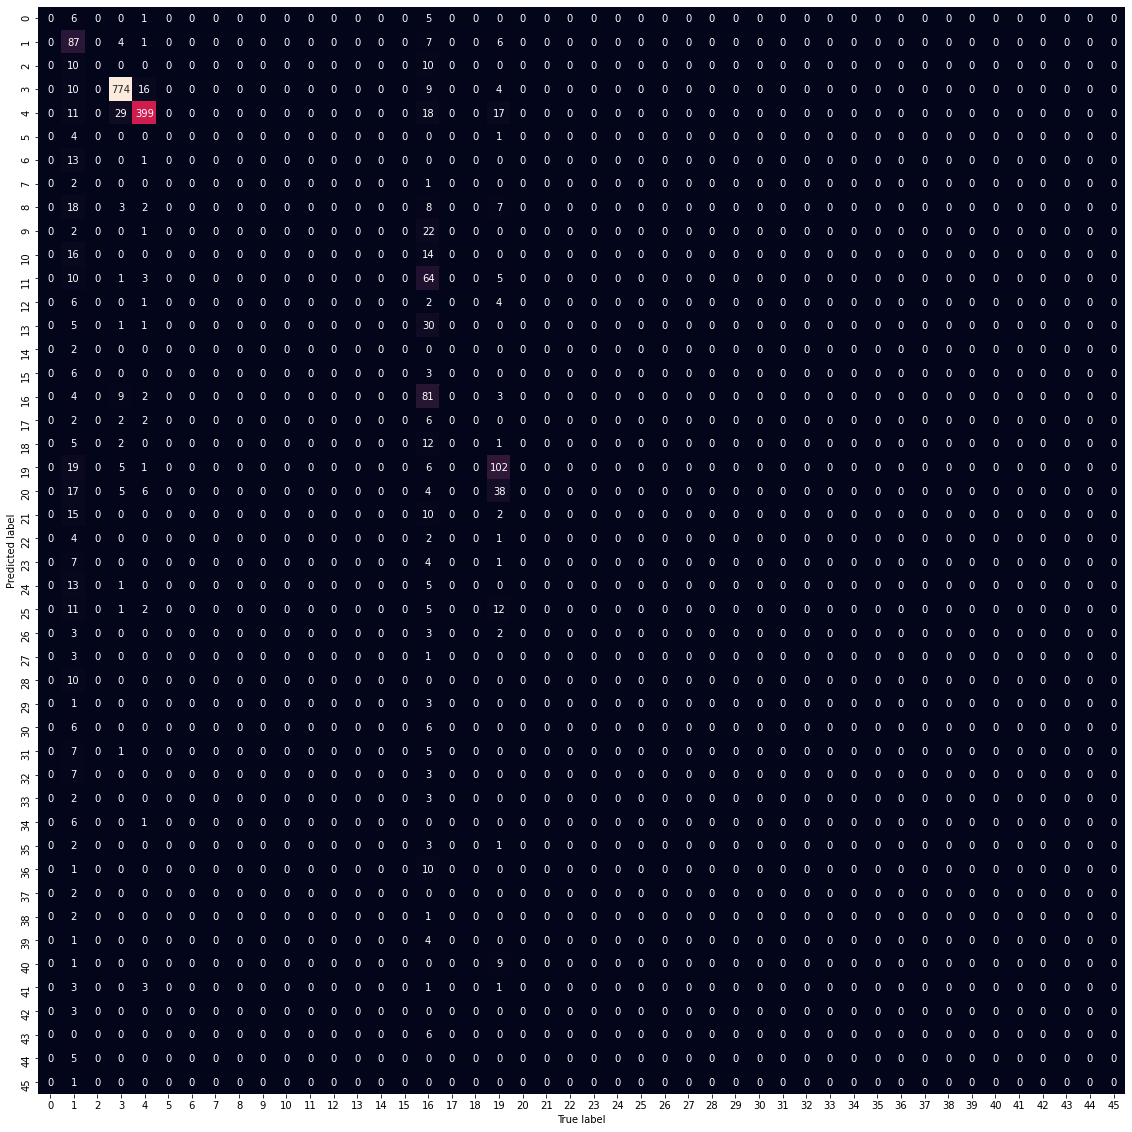

In [142]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test, predicted_classes), square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')